In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1.1

In [26]:
N = 1000
m = float(input("Enter Mean: ")) # 0
v = float(input("Enter Variance: ")) # 1

In [27]:
def normal_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

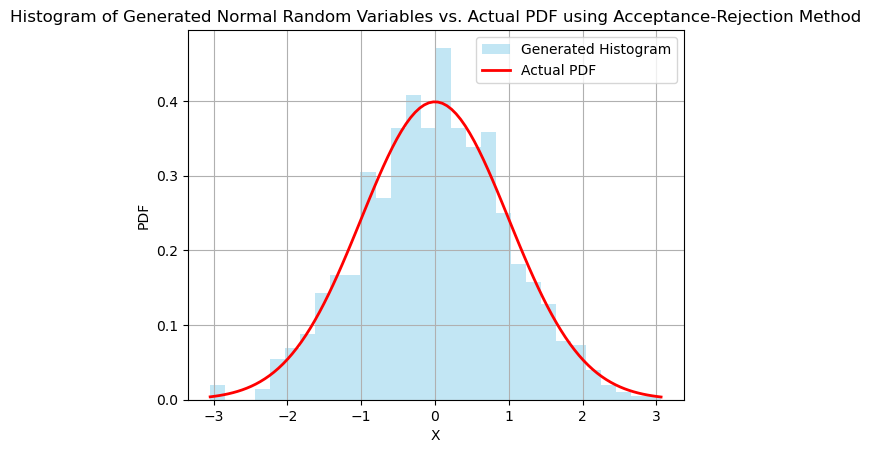

In [28]:
# METHOD 1: ACCEPTANCE-REJECTION METHOD

def gen_expo(lamb, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    Y = -lamb * np.log(1 - U)
    return Y

def acceptance_rejection(mean, std, N):
    Z = []
    c = np.sqrt(2 * np.e / np.pi)
    while len(Z) < N:
        Y = gen_expo(1, 1)[0] 
        U = np.random.uniform(0, 1)
        if U <= np.exp(-0.5 * (Y - 1)**2):
            Z_abs = Y
            U2 = np.random.uniform(0, 1)
            Z_value = Z_abs if U2 < 0.5 else -Z_abs
            Z.append(mean + std * Z_value)
    return np.array(Z)


Z_acceptance = acceptance_rejection(m, np.sqrt(v), N)

plt.figure()
plt.hist(Z_acceptance, bins=30, density=True, alpha=0.5, color='skyblue', label='Generated Histogram')
x_vals = np.linspace(min(Z_acceptance), max(Z_acceptance), 100)
plt.plot(x_vals, normal_pdf(x_vals, m, np.sqrt(v)), 'r', linewidth=2, label='Actual PDF')
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Histogram of Generated Normal Random Variables vs. Actual PDF using Acceptance-Rejection Method')
plt.legend()
plt.grid(True)
plt.show()

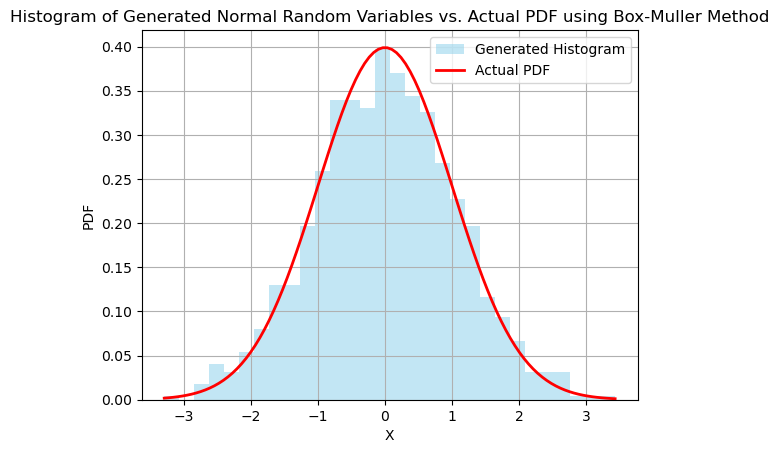

In [29]:
# METHOD 2: BOX-MULLER METHOD

def gen_expo(lamb, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    D = -lamb * np.log(1 - U)
    return D

def box_muller(mean, std, N, lamb=2):
    D = gen_expo(lamb, N)
    Z, U = [], []

    for d in D:
        theta = np.random.uniform(0, 2 * np.pi)
        Z.append(np.sqrt(d) * np.cos(theta))
        U.append(np.sqrt(d) * np.sin(theta))

    Z = mean + std * np.array(Z)
    U = mean + std * np.array(U)

    return np.array(U), np.array(Z)

U_box, Z_box = box_muller(m, np.sqrt(v), N)

plt.figure()
plt.hist(Z_box, bins=30, density=True, alpha=0.5, color='skyblue', label='Generated Histogram')
x_vals = np.linspace(min(Z_box), max(Z_box), 100)
plt.plot(x_vals, (1 / (np.sqrt(2 * np.pi * v))) * np.exp(-(x_vals - m)**2 / (2 * v)),'r', linewidth=2, label='Actual PDF')
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Histogram of Generated Normal Random Variables vs. Actual PDF using Box-Muller Method')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def calculate_second_moment(random_numbers):
    return np.mean(np.array(random_numbers) ** 2)

_, rn_box_muller = box_muller(m, np.sqrt(v), N)
rc_acceptance_rejection = acceptance_rejection(m, np.sqrt(v), N)

second_moment_box_muller = calculate_second_moment(rn_box_muller)
second_moment_acceptance = calculate_second_moment(rc_acceptance_rejection)

print(f"Estiamte of the Second Moment (Box-Muller Method): {second_moment_box_muller}")
print(f"Estiamte of the Second Moment (Acceptance-Rejection Method): {second_moment_acceptance}")

second_moment_box_muller_sim = []
second_moment_acceptance_rejection_sim = []

for _ in range(50):
    _, rn_box_muller = box_muller(m, np.sqrt(v), N)
    second_moment_box_muller_sim.append(calculate_second_moment(rn_box_muller))
    rc_acceptance_rejection = acceptance_rejection(m, np.sqrt(v), N)
    second_moment_acceptance_rejection_sim.append(calculate_second_moment(rc_acceptance_rejection))

variance_box_muller = np.var(second_moment_box_muller_sim)
variance_acceptance_rejection = np.var(second_moment_acceptance_rejection_sim)

print(f"Estiamte of the Variance of second moment (Box-Muller Method): {variance_box_muller}")
print(f"Estiamte of the Variance of second moment (Acceptance-Rejection Method): {variance_acceptance_rejection}")

Estiamte of the Second Moment (Box-Muller Method): 1.0245113871809681
Estiamte of the Second Moment (Acceptance-Rejection Method): 1.0347501712653508
Estiamte of the Variance of second moment (Box-Muller Method): 0.00041719450678844993
Estiamte of the Variance of second moment (Acceptance-Rejection Method): 0.00033460869799489286


# Q1.2

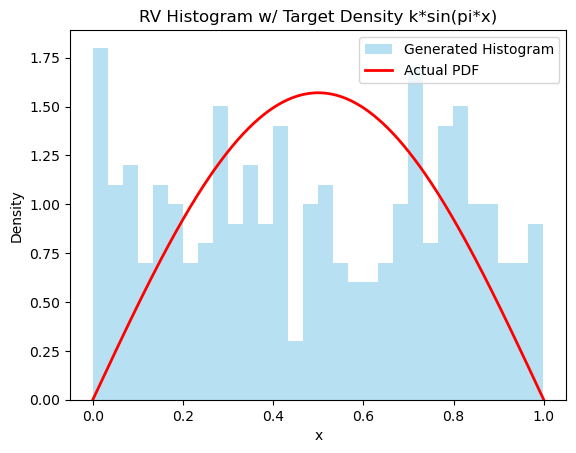

In [23]:
def generate_random_ksinpix(n):
    generated_samples = []
    k = np.pi / 2  # Normalization constant k, calculated by hand
    m = 6  # Normalization constant m, calculated by hand

    while len(generated_samples) < n:
        random_uni_decision = np.random.uniform(0, 1)
        random_uni = np.random.uniform(0, 1)
        
        f1 = k * np.sin(np.pi * random_uni)
        f2 = m * random_uni * (1 - random_uni)

        if random_uni_decision < f1 / f2:
            generated_samples.append(random_uni)
    
    return np.array(generated_samples)

random_ksinpix = generate_random_ksinpix(300)

plt.hist(random_ksinpix, bins=30, density=True, alpha=0.6, color='skyblue', label='Generated Histogram')
plt.title("RV Histogram w/ Target Density k*sin(pi*x)")
plt.xlabel("x")
plt.ylabel("Density")
x_values = np.linspace(0, 1, 1000)
actual_pdf = (np.pi / 2) * np.sin(np.pi * x_values)
plt.plot(x_values, actual_pdf, 'r', linewidth=2, label='Actual PDF')
plt.legend()
plt.show()

In [24]:
random_samples = generate_random_ksinpix(300)
initial_second_moment = np.mean(random_samples ** 2)
print(f"Estiamte of the Second Moment: {initial_second_moment}")

second_moment_trials = [np.mean(generate_random_ksinpix(300) ** 2) for _ in range(50)]
variance_of_second_moment = np.var(second_moment_trials)
print(f"Estimate of the Variance of the Second Moment: {variance_of_second_moment}")

Estiamte of the Second Moment: 0.3293895307563562
Estimate of the Variance of the Second Moment: 0.00021868168084556295


# Q1.3

In [15]:
N = 100000
s1, s2, s3 = 0, 0, 0  
estimate1_values = []
estimate2_values = []
estimate3_values = []

for _ in range(N):
    u = np.random.uniform(0, 1, 10)
    
    # Standard MC estimation
    f = 1 / (1 + u)
    estimate1 = f.mean()
    s1 += estimate1
    estimate1_values.append(estimate1)
    
    # Antithetic variable approach
    xp = u[:5]
    xn = 1 - xp
    x_s = np.concatenate([xp, xn])
    f2 = 1 / (1 + x_s)
    estimate2 = f2.mean()
    s2 += estimate2
    estimate2_values.append(estimate2)
    
    # Control variable approach
    f3 = 1 + u
    estimate3 = f3.mean()
    s3 += estimate3
    estimate3_values.append(estimate3)

estimate1 = s1 / N
estimate2 = s2 / N
estimate3 = s3 / N

integral_value = np.log(2)

def covar(values1, values2):
    return np.cov(values1, values2)[0, 1]

Var1 = np.var(estimate1_values)
Var2 = np.var(estimate2_values)
Var3 = np.var(estimate3_values)

C = -1 * (covar(estimate1_values, estimate3_values)) / Var3  
Var3 = np.var(np.array(estimate1_values) + C * (np.array(estimate3_values) - np.mean(estimate3_values)))

In [16]:
print(f"(a) Standard Monte Carlo Estimator")
print(f"    Estimated Value: {estimate1}")
print(f"    Actual Integral Value: {integral_value}")
print(f"    Original Sample Variance: {Var1}\n")

print(f"(b) Monte Carlo Estimator with Antithetic Variables")
print(f"    Estimated Value: {estimate2}")
print(f"    Actual Integral Value: {integral_value}")
print(f"    Variance reduction with Antithetic Variables: {Var2}\n")

print(f"(c) Monte Carlo Estimator with Control Variables")
print(f"    Estimated Value: {estimate3}")
print(f"    Actual Integral Value: {integral_value}")
print(f"    Variance reduction with Control Variables: {Var3}")

(a) Standard Monte Carlo Estimator
    Estimated Value: 0.6930193392541214
    Actual Integral Value: 0.6931471805599453
    Original Sample Variance: 0.001962408123337442

(b) Monte Carlo Estimator with Antithetic Variables
    Estimated Value: 0.693086939187493
    Actual Integral Value: 0.6931471805599453
    Variance reduction with Antithetic Variables: 0.0001192749329828464

(c) Monte Carlo Estimator with Control Variables
    Estimated Value: 1.5002512133704151
    Actual Integral Value: 0.6931471805599453
    Variance reduction with Control Variables: 6.130319685420987e-05


# Q3

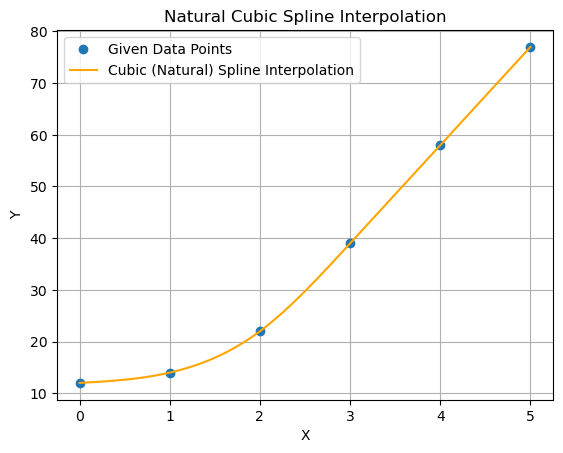

In [25]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([12, 14, 22, 39, 58, 77])

def cubic_spline_interpolation(x, y):
    n = len(x) - 1
    h = np.diff(x)

    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)

    A[0, 0] = 1
    A[n, n] = 1

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    c = np.linalg.solve(A, B)

    b = [(y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3 for i in range(n)]
    d = [(c[i+1] - c[i]) / (3*h[i]) for i in range(n)]
    a = y[:-1]
    
    return a, b, c[:-1], d

a, b, c, d = cubic_spline_interpolation(x, y)

def evaluate_spline(x_val, x, a, b, c, d):
    for i in range(len(x) - 1):
        if x[i] <= x_val <= x[i + 1]:
            dx = x_val - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

x_interpolated = np.linspace(x[0], x[-1], 100)
y_interpolated = [evaluate_spline(xi, x, a, b, c, d) for xi in x_interpolated]

plt.plot(x, y, 'o', label="Given Data Points")
plt.plot(x_interpolated, y_interpolated, label="Cubic (Natural) Spline Interpolation", color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Natural Cubic Spline Interpolation")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# Q4

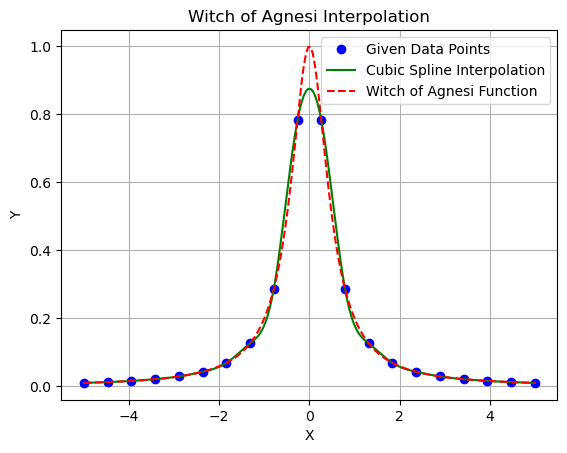

In [21]:
def witch_of_agnesi(x):
    return 1 / (4 * x**2 + 1)

x_data = np.linspace(-5, 5, 20)
y_data = witch_of_agnesi(x_data)

a, b, c, d = cubic_spline_interpolation(x_data, y_data)
x_interpolated = np.linspace(-5, 5, 200)
y_interpolated = [evaluate_spline(xi, x_data, a, b, c, d) for xi in x_interpolated]

plt.plot(x_data, y_data, 'o', label="Given Data Points", color="blue")
plt.plot(x_interpolated, y_interpolated, label="Cubic Spline Interpolation", color="green")
plt.plot(x_interpolated, witch_of_agnesi(x_interpolated), label="Witch of Agnesi Function", color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Witch of Agnesi Interpolation")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()